In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [26]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import interpolate
import h5py
import qnm
from numpy import vectorize
from scipy.interpolate import interp1d
from scipy.optimize import minimize
from scipy.optimize import least_squares
pl.rc('figure', figsize=(6.1, 4.5))
pl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': ['Georgia'],
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 14,
                     'xtick.labelsize': 'medium',
                     'ytick.labelsize': 'medium',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'axes.labelsize': 'large',
                     'axes.titlesize': 'large',
                     'axes.grid': False,
                     'grid.alpha': 0.73,
                     'lines.markersize': 12,
                     'legend.borderpad': 0.2,
                     'legend.fancybox': True,
                     'legend.fontsize': 12,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [27]:
t_unit=68.5*2950./2/299792458

In [28]:
mass_max_overtone1=np.loadtxt('time_rest/mass1_overtone')
spin_max_overtone1=np.loadtxt('time_rest/spin1_overtone')
tinit_overtone1=np.loadtxt('time_rest/tinit1_overtone')
epsilong_overtone1=np.sqrt(((mass_max_overtone1-68.5)/68.5)**2+(spin_max_overtone1-0.69)**2)

In [29]:
mass_max_overtone2=np.loadtxt('time_rest/mass2_overtone')
spin_max_overtone2=np.loadtxt('time_rest/spin2_overtone')
tinit_overtone2=np.loadtxt('time_rest/tinit2_overtone')
epsilong_overtone2=np.sqrt(((mass_max_overtone2-68.5)/68.5)**2+(spin_max_overtone2-0.69)**2)

In [30]:
mass_max_overtone3=np.loadtxt('time_rest/mass3_overtone')
spin_max_overtone3=np.loadtxt('time_rest/spin3_overtone')
tinit_overtone3=np.loadtxt('time_rest/tinit3_overtone')
epsilong_overtone3=np.sqrt(((mass_max_overtone3-68.5)/68.5)**2+(spin_max_overtone3-0.69)**2)

In [31]:
mass_max1=np.loadtxt('time_rest/mass1')
spin_max1=np.loadtxt('time_rest/spin1')
tinit1=np.loadtxt('time_rest/tinit1')
epsilong1=np.sqrt(((mass_max1-68.5)/68.5)**2+(spin_max1-0.69)**2)

In [32]:
mass_max2=np.loadtxt('time_rest/mass2')
spin_max2=np.loadtxt('time_rest/spin2')
tinit2=np.loadtxt('time_rest/tinit2')
epsilong2=np.sqrt(((mass_max2-68.5)/68.5)**2+(spin_max2-0.69)**2)

In [33]:
mass_max3=np.loadtxt('time_rest/mass3')
spin_max3=np.loadtxt('time_rest/spin3')
tinit3=np.loadtxt('time_rest/tinit3')
epsilong3=np.sqrt(((mass_max3-68.5)/68.5)**2+(spin_max3-0.69)**2)

In [34]:
mean_mass=(34+140)/2
mean_spin=(0.1+0.95)/2
mean_epsilong=np.sqrt(((mean_mass-68.5)/68.5)**2+(mean_spin-0.692085186818)**2)

In [35]:
epsilong_overtone_join=np.concatenate((epsilong_overtone1,epsilong_overtone2,epsilong_overtone3))
tinit_overtone_join=np.concatenate((tinit_overtone1,tinit_overtone2,tinit_overtone3))

In [36]:
epsilong_join=np.concatenate((epsilong1,epsilong2,epsilong3))
tinit_join=np.concatenate((tinit1,tinit2,tinit3))

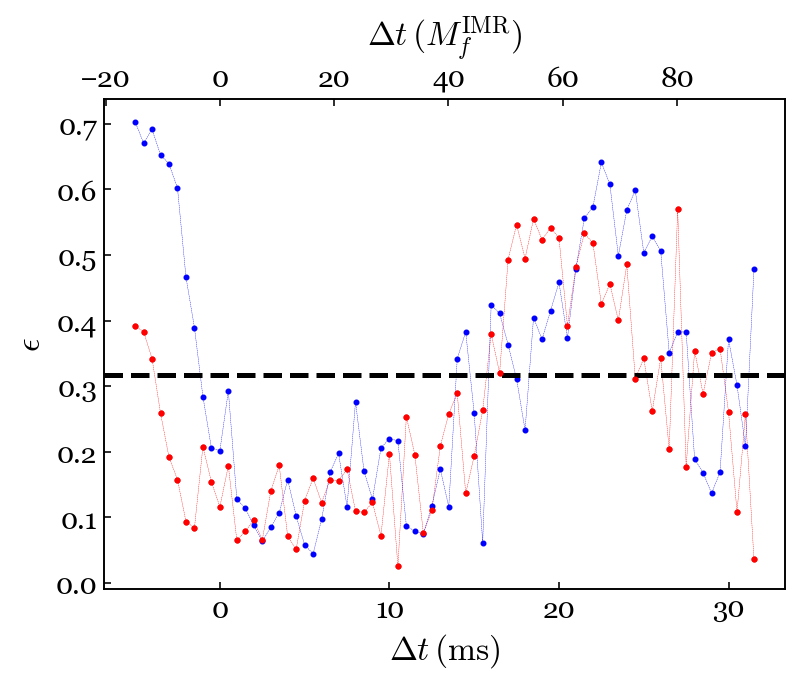

In [37]:
fig = pl.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(tinit_overtone_join,epsilong_overtone_join,'o',ms=2,color='r')
ax1.plot(tinit_overtone_join,epsilong_overtone_join,'--',lw=0.2,color='r')

ax1.plot(tinit_join,epsilong_join,'o',ms=2,color='b')
ax1.plot(tinit_join,epsilong_join,'--',lw=0.2,color='b')

ax2.plot(tinit_overtone_join/t_unit*1e-3,epsilong_overtone_join,'o',ms=2,color='r')
# ax2.set_xlim(-5,30)
# ax1.set_xlim(-5*t_unit*1e3,30*t_unit*1e3)
ax1.set_xlabel(r'$\Delta t\, ({\rm ms})$')
ax2.set_xlabel(r'$\Delta t\, (M_f^{\rm IMR})$',labelpad=10)
ax1.set_ylabel(r'$\epsilon$')

ax1.axhline(y=mean_epsilong,ls='--',color='k')
# pl.axhline(y=0.69,lw=1)
pl.savefig('GW150914_likelihood_time.pdf',bbox_inches='tight')

In [38]:
np.savetxt('time_rest/epsilong_overtone_join',epsilong_overtone_join)
np.savetxt('time_rest/tinit_overtone_join',tinit_overtone_join)

np.savetxt('time_rest/epsilong_join',epsilong_join)
np.savetxt('time_rest/tinit_join',tinit_join)